In [16]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import math

plt.rcParams['text.usetex'] = True

def harmonic(N, s):
    harmonic_sum = 0
    for k in range(1,N+1):
        harmonic_sum += 1/(k**s)
    return harmonic_sum

def zipf(k, N, s):
    return 1 / (harmonic(N,s) * k**s)

def binom(n, k):
    return math.factorial(n) // math.factorial(k) // math.factorial(n - k)

def binomExp(p, n, k):
    return binom(n,k) * p**k * (1-p)**(n-k)

def binomExpMean(prob, num_events):
    return sum([k*binomExp(prob, num_events, k) for k in range(num_events+1)])

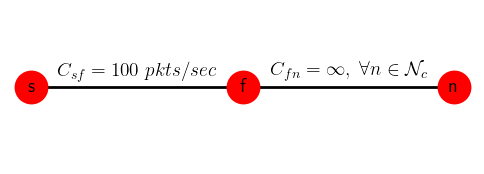

In [74]:
edges = [['s', 'f'], ['f', 'n']]
G = nx.Graph()
G.add_edges_from(edges)
pos = {'s':[-0.5,0],'f':[0,0],'n':[0.5,0]}

fig, ax = plt.subplots(figsize=(6, 2))
ax.margins(0.05)  # Adjust the margins as needed

nx.draw(
    G, pos, ax=ax, edge_color='black', width=2, linewidths=2,
    node_size=500, node_color='red', alpha=1,
    labels={node: node for node in G.nodes()}, font_size=14
)
label_pos = {}
for node, coords in pos.items():
    label_pos[node] = (coords[0], coords[1] + 0.01)

nx.draw_networkx_edge_labels(
    G, label_pos,
    edge_labels={('s', 'f'): r'$C_{sf} = 100 \; pkts/sec$', 
                 ('f', 'n'): r'$C_{fn} = \infty, \; \forall n \in \mathcal{N}_{c}$'},
    font_color='black', font_size=14, bbox={'alpha':0}
)
ax.margins(0)
plt.savefig("../Repos/proposal-review/images/toynet.svg",bbox_inches='tight',pad_inches=0)

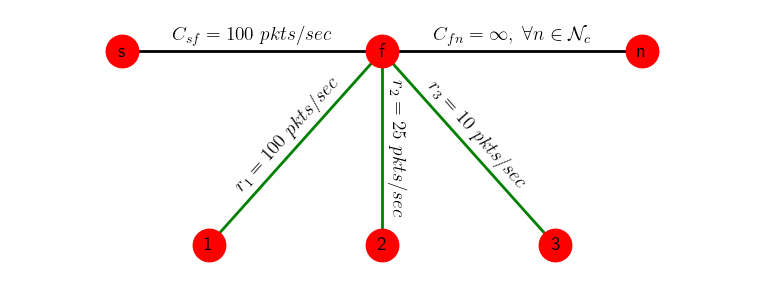

In [73]:
edges = [['s', 'f'], ['f', 'n'], ['f','1'], ['f','2'], ['f','3']]
G = nx.Graph()
G.add_edges_from(edges)
pos = {'s':[-0.75,0],'f':[0,0], 'n':[0.75,0], '1':[-0.5,-0.25], '2':[0,-0.25], '3':[0.5,-0.25]}

fig, ax = plt.subplots(figsize=(9.6, 3.6))
ax.margins(0.15)  # Adjust the margins as needed

edge_colors = ['k','k','g','g','g']
nx.draw(
    G, pos, ax=ax, edge_color=edge_colors, width=2, linewidths=2,
    node_size=500, node_color='red', alpha=1,
    labels={node: node for node in G.nodes()}, font_size=14
)
label_pos = {}
for node, coords in pos.items():
    label_pos[node] = (coords[0], coords[1] + 0.02)
nx.draw_networkx_edge_labels(
    G, label_pos,
    edge_labels={('s', 'f'): r'$C_{sf} = 100 \; pkts/sec$', 
                 ('f', 'n'): r'$C_{fn} = \infty, \; \forall n \in \mathcal{N}_{c}$'
                 },
    font_color='black', font_size=14, bbox={'alpha':0}
)
for node, coords in pos.items():
    label_pos[node] = (coords[0], coords[1] + 0.03)
nx.draw_networkx_edge_labels(
    G, label_pos, label_pos=0.45,
    edge_labels={('f','1'): r'$r_{1} = 100 \; pkts/sec$',
                 ('f','3'): r'$r_{3} = 10 \; pkts/sec$'},
    font_color='black', font_size=14, bbox={'alpha':0}
)
label_pos['f'] = (0.045,0)
label_pos['2'] = (0.045,-0.25)
nx.draw_networkx_edge_labels(
    G, label_pos, edge_labels={('f','2'): r'$r_{2} = 25 \; pkts/sec$'}, font_color='black', font_size=14, bbox={'alpha':0}
)
plt.savefig("../Repos/proposal-review/images/toynet_cache.svg",bbox_inches='tight',pad_inches=0)

In [3]:
N = 1000
s = 0.75
x = list(range(1,N+1))
pdf = [zipf(k, N, s) for k in x]
y = np.cumsum(pdf) # CDF

In [ ]:
pdf[0]

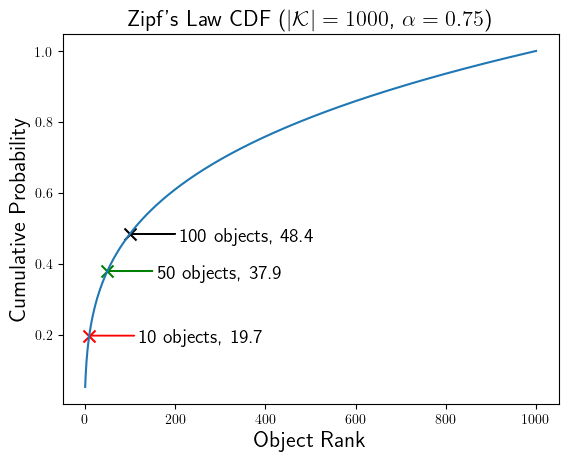

In [18]:
plt.plot(x,y)
plt.xlabel("Object Rank",fontsize=16)
plt.ylabel("Cumulative Probability",fontsize=16)
plt.title(r"Zipf's Law CDF ($|\mathcal{K}|=1000$, $\alpha=0.75$)",fontsize=16)
plt.scatter(x[9], y[9], c='red', marker='x', s=75)
plt.arrow(x[9], y[9], N*0.1, 0, color='red')
plt.text(x[9]+(N*0.11), y[9]-0.02, f"10 objects, {round(100*y[9],1)}%",fontsize=14)
plt.scatter(x[49], y[49], c='green', marker='x', s=75)
plt.arrow(x[49], y[49], N*0.1, 0, color='green')
plt.text(x[49]+(N*0.11), y[49]-0.02, f"50 objects, {round(100*y[49],1)}%",fontsize=14)
plt.scatter(x[99], y[99], c='black', marker='x', s=75)
plt.arrow(x[99], y[99], N*0.1, 0, color='black')
plt.text(x[99]+(N*0.11), y[99]-0.02, f"100 objects, {round(100*y[99],1)}%",fontsize=14)
plt.savefig("../Repos/proposal-review/images/zipf_1k.svg")

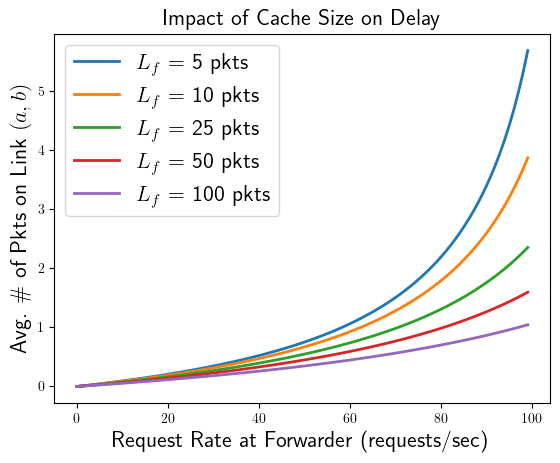

In [10]:
request_rate = list(range(100))
cache_caps = [5,10,25,50,100]
link_cap = 100
for cap in cache_caps:
    prob = y[cap-1]
    hits = [prob*rate for rate in request_rate]
    fwd_rate = [request_rate[i]-hits[i] for i in range(100)] 
    delay = [fwd_rate[i]/(link_cap-fwd_rate[i]) for i in range(100)]
    plt.plot(request_rate,delay,linewidth=2)
plt.xlabel("Request Rate at Forwarder (requests/sec)",fontsize=16)
plt.ylabel(r"Avg. \# of Pkts on Link $(a,b)$",fontsize=16)
plt.title(f"Impact of Cache Size on Delay",fontsize=16)
plt.legend([r"$L_f$ = 5 pkts",r"$L_f$ = 10 pkts",r"$L_f$ = 25 pkts",r"$L_f$ = 50 pkts",r"$L_f$ = 100 pkts"],fontsize=16)
plt.savefig("../Repos/proposal-review/images/cache_size.svg")


For servicenet example, with N=1000, s=0.75 and 90 obj/sec coming into the forwarder:
- With no cache, there are on average 9 packets waiting at the server-forwarder link
- With 10 obj. cache, cache takes roughly 18 hits, there are on average 2.5 packets (%72 reduction)
- With 50 obj. cache, cache takes roughly 34 hits, there are on average 1.25 packets (%86 reduction)
- With 100 obj. cache, cache takes roughly 44 hits, there are on average 0.85 packets (%95 reduction)
Time-to-first-byte (TTFB) is also improved!

When cache speeds are considered:
- 10 obj. cache takes 18 of the hits, 40 obj. cache takes 16 of the hits, 50 obj. cache takes 10 of the hits